<a id="top"></a>
# Table of Contents
### 0. [Introduction](#0)
### 1. [Data Gathering](#1)
### 2. [Preprocessing](#2)
### 3. [EDA and Visualization](#3)
### 4. [Modeling](#4)
### 5. [Conclusions](#5)
### 6. [Further Steps](#6)

# 0. Introduction<a id='0'></a>


# 1. Data Gathering<a id='1'></a>
[(Back to Top)](#top)

In [1]:
# %run /python_scripts/extract_transform_yearly_team_data.py
# %run /python_scripts/gather_years.py
# %run /python_scripts/playoff_ranks.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# 2. Preprocessing<a id='2'></a>
[(Back to Top)](#top)

In [3]:
# Helper Functions
def show_list(df: pd.DataFrame) -> None:
    '''prints each columns name and its respective index in df.columns'''
    for i, (key, value) in enumerate(df.dtypes.items()):
        print(i, '-', key,'-', value)

def rename(df):
    name_mapping = {'New Orleans/Oklahoma City Hornets': 'New Orleans Pelicans',
                'Vancouver Grizzlies': 'Memphis Grizzlies',
                'New Jersey Nets': 'Brooklyn Nets',
                'Seattle SuperSonics': 'Oklahoma City Thunder',
                'New Orleans Hornets': 'New Orleans Pelicans',
                'Charlotte Bobcats': 'Charlotte Hornets',
                }
    df['Team'] = df['Team'].map(name_mapping).fillna(df['Team'])
    return df

In [4]:
yearly = pd.read_csv('./yearly_stats.csv')
yearly = rename(yearly)
yearly.sample(10) # used as pd.head() but shows more variety

,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,...,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,Unnamed: 13_level_1_shooting_against,2P_shooting_against_1,0-3_shooting_against_1,3-10_shooting_against_1,10-16_shooting_against_1,16-3P_shooting_against_1,3P_shooting_against_1,Unnamed: 20_level_1_shooting_against,2P_shooting_against_1_2,3P_shooting_against_1_2,Unnamed: 23_level_1_shooting_against,%FGA_shooting_against,Md._shooting_against,Unnamed: 26_level_1_shooting_against,%FGA_shooting_against_1,Md._shooting_against_1,Unnamed: 29_level_1_shooting_against,%3PA_shooting_against,3P%_shooting_against
505,505,19.0,Indiana Pacers,82.0,19780.0,3447.0,7130.0,0.483,48.0,207.0,0.232,3399.0,6923.0,0.491,1624.0,2119.0,0.766,1002.0,2398.0,3400.0,2169.0,834.0,398.0,1525.0,2061.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,275,9.0,Oklahoma City Thunder,82.0,19755.0,3584.0,8056.0,0.445,NaN,NaN,NaN,3584.0,8056.0,0.445,1606.0,2095.0,0.767,1323.0,2706.0,4029.0,2106.0,689.0,294.0,1622.0,2074.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1354,1354,12.0,Milwaukee Bucks,82.0,19830.0,3128.0,7197.0,0.435,601.0,1670.0,0.360,2527.0,5527.0,0.457,1251.0,1700.0,0.736,1068.0,2537.0,3605.0,1876.0,685.0,550.0,1156.0,1554.0,...,0.781,0.345,0.157,0.118,0.161,0.219,NaN,0.483,0.609,0.365,0.390,0.399,0.348,NaN,0.543,0.888,NaN,0.051,321.0,NaN,0.270,1046.0,NaN,0.308,0.363
74,74,2.0,Boston Celtics,72.0,NaN,3006.0,7759.0,0.387,NaN,NaN,NaN,3006.0,7759.0,0.387,1904.0,2585.0,0.737,NaN,NaN,5402.0,1508.0,NaN,NaN,NaN,1723.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1159,1159,21.0,Detroit Pistons,82.0,19880.0,2942.0,6484.0,0.454,449.0,1305.0,0.344,2493.0,5179.0,0.481,1539.0,1988.0,0.774,948.0,2374.0,3322.0,1768.0,583.0,472.0,1001.0,1672.0,...,0.810,0.339,0.112,0.118,0.242,0.190,NaN,0.470,0.584,0.360,0.359,0.414,0.339,NaN,0.539,0.851,NaN,0.043,244.0,NaN,0.273,918.0,NaN,0.329,0.374
1421,1421,11.0,Phoenix Suns,82.0,19880.0,3178.0,7038.0,0.452,698.0,2048.0,0.341,2480.0,4990.0,0.497,1343.0,1767.0,0.760,896.0,2643.0,3539.0,1659.0,700.0,385.0,1238.0,1744.0,...,0.742,0.305,0.178,0.096,0.163,0.258,NaN,0.486,0.644,0.361,0.375,0.394,0.352,NaN,0.491,0.788,NaN,0.050,312.0,NaN,0.236,1000.0,NaN,0.231,0.414
1590,1590,22.0,Orlando Magic,73.0,17570.0,2871.0,6468.0,0.444,807.0,2354.0,0.343,2064.0,4114.0,0.502,1282.0,1656.0,0.774,751.0,2498.0,3249.0,1747.0,599.0,396.0,937.0,1336.0,...,0.613,0.260,0.172,0.100,0.082,0.387,NaN,0.529,0.684,0.381,0.445,0.445,0.364,NaN,0.509,0.848,NaN,0.055,309.0,NaN,0.273,935.0,NaN,0.200,0.422
130,130,2.0,Boston Celtics,80.0,NaN,3619.0,8770.0,0.413,NaN,NaN,NaN,3619.0,8770.0,0.413,1804.0,2489.0,0.725,NaN,NaN,5736.0,1760.0,NaN,NaN,NaN,2125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,1013,3.0,Sacramento Kings,82.0,19830.0,3242.0,6990.0,0.464,491.0,1288.0,0.381,2751.0,5702.0,0.482,1367.0,1832.0,0.746,900.0,2751.0,3651.0,2034.0,736.0,457.0,1192.0,1666.0,...,0.836,0.243,0.186,0.126,0.281,0.164,NaN,0.439,0.617,0.363,0.362,0.371,0.320,NaN,0.553,0.836,NaN,0.047,295.0,NaN,0.173,696.0,NaN,0.237,0.315
446,446,8.0,Golden State Warriors,82.0,19780.0,3646.0,7349.0,0.496,91.0,325.0,0.280,3555.0,7024.0,0.506,1709.0,2382.0,0.717,1282.0,2452.0,3734.0,1820.0,685.0,391.0,1424.0,2225.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
playoff = pd.read_csv('./playoff_ranks.csv')
playoff.sample(10)

,Team,Round Finished,Year
283,Dallas Mavericks,1,2008
404,Utah Jazz,1,2012
349,Memphis Grizzlies,-1,2010
751,Chicago Bulls,-1,2023
598,Chicago Bulls,-1,2018
312,Utah Jazz,1,2009
500,Oklahoma City Thunder,-1,2015
302,Portland Trail Blazers,-1,2008
481,Milwaukee Bucks,-1,2014
466,Atlanta Hawks,1,2014


In [6]:
# drop full nan columns
yearly.dropna(axis=1, how='all', inplace=True)

# change years to year playoffs occured, 2021-22 -> 2022
yearly['Year'] = [int(x[:-3])+1 for x in yearly.loc[:, 'Year']]

# keep years that have shooting stats
yearly = yearly[yearly['Year'] > 1999]

# drop non-team data
yearly = yearly[~yearly['Team'].isin(
    ['Southeast Division', 'Northwest Division', 'Southwest Division', 'League Average'])]

# drop fake index and Rk column
yearly.drop(['Unnamed: 0', 'Rk'], inplace=True, axis=1)

# change WinLos% to a float
cols_to_float = ['W/L%', 'SRS_standings']
yearly[cols_to_float] = yearly[cols_to_float].astype('float')

# reset index
yearly.reset_index(drop=True, inplace=True)
yearly

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 0_szn_totals_against,...,Rk_shooting_against,G_shooting_against,MP_shooting_against,FG%_shooting_against,Dist._shooting_against,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,2P_shooting_against_1,0-3_shooting_against_1,3-10_shooting_against_1,10-16_shooting_against_1,16-3P_shooting_against_1,3P_shooting_against_1,2P_shooting_against_1_2,3P_shooting_against_1_2,%FGA_shooting_against,Md._shooting_against,%FGA_shooting_against_1,Md._shooting_against_1,%3PA_shooting_against,3P%_shooting_against
0,Sacramento Kings,82.0,19805.0,3276.0,7288.0,0.450,534.0,1656.0,0.322,2742.0,5632.0,0.487,1521.0,2016.0,0.754,1056.0,2635.0,3691.0,1953.0,787.0,381.0,1325.0,1729.0,8607.0,26.0,...,23.0,82.0,19805.0,0.452,12.7,0.845,0.163,0.224,0.208,0.249,0.155,0.470,0.875,0.412,0.287,0.409,0.353,0.559,0.866,0.048,320.0,NaN,NaN,0.252,0.410
1,Detroit Pistons,82.0,19830.0,3044.0,6635.0,0.459,439.0,1223.0,0.359,2605.0,5412.0,0.481,1956.0,2506.0,0.781,917.0,2458.0,3375.0,1707.0,665.0,273.0,1288.0,2011.0,8483.0,25.0,...,8.0,82.0,19830.0,0.465,13.7,0.816,0.175,0.132,0.255,0.255,0.184,0.486,0.927,0.431,0.250,0.449,0.371,0.562,0.869,0.042,266.0,NaN,NaN,0.238,0.432
2,Dallas Mavericks,82.0,19730.0,3195.0,7047.0,0.453,519.0,1326.0,0.391,2676.0,5721.0,0.468,1407.0,1751.0,0.804,931.0,2444.0,3375.0,1810.0,592.0,416.0,1124.0,1770.0,8316.0,24.0,...,6.0,82.0,19730.0,0.457,12.6,0.824,0.194,0.183,0.230,0.217,0.176,0.481,0.891,0.380,0.247,0.447,0.345,0.556,0.809,0.053,345.0,NaN,NaN,0.236,0.365
3,Indiana Pacers,82.0,19730.0,3047.0,6640.0,0.459,583.0,1487.0,0.392,2464.0,5153.0,0.478,1629.0,2008.0,0.811,842.0,2612.0,3454.0,1857.0,559.0,422.0,1159.0,1786.0,8306.0,11.0,...,11.0,82.0,19730.0,0.446,11.9,0.856,0.196,0.238,0.213,0.210,0.144,0.466,0.750,0.402,0.314,0.427,0.327,0.524,0.842,0.042,278.0,NaN,NaN,0.203,0.289
4,Milwaukee Bucks,82.0,19855.0,3174.0,6827.0,0.465,394.0,1069.0,0.369,2780.0,5758.0,0.483,1558.0,1982.0,0.786,1016.0,2373.0,3389.0,1852.0,671.0,381.0,1230.0,2020.0,8300.0,22.0,...,15.0,82.0,19855.0,0.457,13.4,0.796,0.182,0.146,0.270,0.198,0.204,0.473,0.903,0.420,0.241,0.435,0.391,0.608,0.878,0.047,284.0,NaN,NaN,0.265,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Orlando Magic,82.0,19780.0,3323.0,7074.0,0.470,883.0,2551.0,0.346,2440.0,4523.0,0.539,1607.0,2050.0,0.784,833.0,2713.0,3546.0,1906.0,603.0,382.0,1236.0,1652.0,9136.0,14.0,...,22.0,82.0,19780.0,0.476,14.8,0.575,0.226,0.186,0.098,0.064,0.425,0.567,0.736,0.471,0.478,0.390,0.351,0.535,0.824,0.065,426.0,0.241,1031.0,0.256,0.401
711,Charlotte Hornets,82.0,19830.0,3385.0,7413.0,0.457,881.0,2669.0,0.330,2504.0,4744.0,0.528,1447.0,1933.0,0.749,901.0,2751.0,3652.0,2062.0,634.0,425.0,1164.0,1661.0,9098.0,21.0,...,5.0,82.0,19830.0,0.477,13.6,0.620,0.280,0.188,0.088,0.063,0.380,0.550,0.677,0.432,0.471,0.446,0.357,0.502,0.859,0.065,408.0,0.284,1154.0,0.253,0.405
712,Houston Rockets,82.0,19755.0,3329.0,7287.0,0.457,856.0,2619.0,0.327,2473.0,4668.0,0.530,1567.0,2078.0,0.754,1100.0,2695.0,3795.0,1835.0,600.0,374.0,1332.0,1679.0,9081.0,27.0,...,11.0,82.0,19755.0,0.482,14.9,0.560,0.217,0.204,0.082,0.056,0.440,0.567,0.741,0.480,0.435,0.399,0.374,0.511,0.817,0.070,435.0,0.255,1114.0,0.216,0.377
713,Detroit Pistons,82.0,19805.0,3244.0,7140.0,0.454,934.0,2659.0,0.351,2310.0,4481.0,0.516,1623.0,2106.0,0.771,916.0,2564.0,3480.0,1884.0,574.0,308.0,1237.0,1813.0,9045.0,26.0,...,9.0,82.0,19805.0,0.489,13.6,0.622,0.245,0.234,0.083,0.060,0.378,0.568,0.723,0.490,0.421,0.437,0.360,0.523,0.792,0.068,439.0,0.281,1201.0,0.255,0.387


In [7]:
full = pd.merge(yearly, playoff, on=['Year', 'Team'])
full

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 0_szn_totals_against,...,G_shooting_against,MP_shooting_against,FG%_shooting_against,Dist._shooting_against,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,2P_shooting_against_1,0-3_shooting_against_1,3-10_shooting_against_1,10-16_shooting_against_1,16-3P_shooting_against_1,3P_shooting_against_1,2P_shooting_against_1_2,3P_shooting_against_1_2,%FGA_shooting_against,Md._shooting_against,%FGA_shooting_against_1,Md._shooting_against_1,%3PA_shooting_against,3P%_shooting_against,Round Finished
0,Sacramento Kings,82.0,19805.0,3276.0,7288.0,0.450,534.0,1656.0,0.322,2742.0,5632.0,0.487,1521.0,2016.0,0.754,1056.0,2635.0,3691.0,1953.0,787.0,381.0,1325.0,1729.0,8607.0,26.0,...,82.0,19805.0,0.452,12.7,0.845,0.163,0.224,0.208,0.249,0.155,0.470,0.875,0.412,0.287,0.409,0.353,0.559,0.866,0.048,320.0,NaN,NaN,0.252,0.410,1
1,Detroit Pistons,82.0,19830.0,3044.0,6635.0,0.459,439.0,1223.0,0.359,2605.0,5412.0,0.481,1956.0,2506.0,0.781,917.0,2458.0,3375.0,1707.0,665.0,273.0,1288.0,2011.0,8483.0,25.0,...,82.0,19830.0,0.465,13.7,0.816,0.175,0.132,0.255,0.255,0.184,0.486,0.927,0.431,0.250,0.449,0.371,0.562,0.869,0.042,266.0,NaN,NaN,0.238,0.432,1
2,Dallas Mavericks,82.0,19730.0,3195.0,7047.0,0.453,519.0,1326.0,0.391,2676.0,5721.0,0.468,1407.0,1751.0,0.804,931.0,2444.0,3375.0,1810.0,592.0,416.0,1124.0,1770.0,8316.0,24.0,...,82.0,19730.0,0.457,12.6,0.824,0.194,0.183,0.230,0.217,0.176,0.481,0.891,0.380,0.247,0.447,0.345,0.556,0.809,0.053,345.0,NaN,NaN,0.236,0.365,-1
3,Indiana Pacers,82.0,19730.0,3047.0,6640.0,0.459,583.0,1487.0,0.392,2464.0,5153.0,0.478,1629.0,2008.0,0.811,842.0,2612.0,3454.0,1857.0,559.0,422.0,1159.0,1786.0,8306.0,11.0,...,82.0,19730.0,0.446,11.9,0.856,0.196,0.238,0.213,0.210,0.144,0.466,0.750,0.402,0.314,0.427,0.327,0.524,0.842,0.042,278.0,NaN,NaN,0.203,0.289,4
4,Milwaukee Bucks,82.0,19855.0,3174.0,6827.0,0.465,394.0,1069.0,0.369,2780.0,5758.0,0.483,1558.0,1982.0,0.786,1016.0,2373.0,3389.0,1852.0,671.0,381.0,1230.0,2020.0,8300.0,22.0,...,82.0,19855.0,0.457,13.4,0.796,0.182,0.146,0.270,0.198,0.204,0.473,0.903,0.420,0.241,0.435,0.391,0.608,0.878,0.047,284.0,NaN,NaN,0.265,0.462,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Orlando Magic,82.0,19780.0,3323.0,7074.0,0.470,883.0,2551.0,0.346,2440.0,4523.0,0.539,1607.0,2050.0,0.784,833.0,2713.0,3546.0,1906.0,603.0,382.0,1236.0,1652.0,9136.0,14.0,...,82.0,19780.0,0.476,14.8,0.575,0.226,0.186,0.098,0.064,0.425,0.567,0.736,0.471,0.478,0.390,0.351,0.535,0.824,0.065,426.0,0.241,1031.0,0.256,0.401,-1
711,Charlotte Hornets,82.0,19830.0,3385.0,7413.0,0.457,881.0,2669.0,0.330,2504.0,4744.0,0.528,1447.0,1933.0,0.749,901.0,2751.0,3652.0,2062.0,634.0,425.0,1164.0,1661.0,9098.0,21.0,...,82.0,19830.0,0.477,13.6,0.620,0.280,0.188,0.088,0.063,0.380,0.550,0.677,0.432,0.471,0.446,0.357,0.502,0.859,0.065,408.0,0.284,1154.0,0.253,0.405,-1
712,Houston Rockets,82.0,19755.0,3329.0,7287.0,0.457,856.0,2619.0,0.327,2473.0,4668.0,0.530,1567.0,2078.0,0.754,1100.0,2695.0,3795.0,1835.0,600.0,374.0,1332.0,1679.0,9081.0,27.0,...,82.0,19755.0,0.482,14.9,0.560,0.217,0.204,0.082,0.056,0.440,0.567,0.741,0.480,0.435,0.399,0.374,0.511,0.817,0.070,435.0,0.255,1114.0,0.216,0.377,-1
713,Detroit Pistons,82.0,19805.0,3244.0,7140.0,0.454,934.0,2659.0,0.351,2310.0,4481.0,0.516,1623.0,2106.0,0.771,916.0,2564.0,3480.0,1884.0,574.0,308.0,1237.0,1813.0,9045.0,26.0,...,82.0,19805.0,0.489,13.6,0.622,0.245,0.234,0.083,0.060,0.378,0.568,0.723,0.490,0.421,0.437,0.360,0.523,0.792,0.068,439.0,0.281,1201.0,0.255,0.387,-1


In [8]:
show_list(full) # show columns and column time

0 - Team - object
1 - G - float64
2 - MP - float64
3 - FG - float64
4 - FGA - float64
5 - FG% - float64
6 - 3P - float64
7 - 3PA - float64
8 - 3P% - float64
9 - 2P - float64
10 - 2PA - float64
11 - 2P% - float64
12 - FT - float64
13 - FTA - float64
14 - FT% - float64
15 - ORB - float64
16 - DRB - float64
17 - TRB - float64
18 - AST - float64
19 - STL - float64
20 - BLK - float64
21 - TOV - float64
22 - PF - float64
23 - PTS - float64
24 - Unnamed: 0_szn_totals_against - float64
25 - Rk_szn_totals_against - float64
26 - G_szn_totals_against - float64
27 - MP_szn_totals_against - float64
28 - FG_szn_totals_against - float64
29 - FGA_szn_totals_against - float64
30 - FG%_szn_totals_against - float64
31 - 3P_szn_totals_against - float64
32 - 3PA_szn_totals_against - float64
33 - 3P%_szn_totals_against - float64
34 - 2P_szn_totals_against - float64
35 - 2PA_szn_totals_against - float64
36 - 2P%_szn_totals_against - float64
37 - FT_szn_totals_against - float64
38 - FTA_szn_totals_against - f

In [9]:
cols_to_use = [0,136,1,50,51,55,56,57,60,61,63,64,65,66,67,69,70,71,98,99,189]
'''
0-Team: Need to see what team wins it all
136-Year: 

'''

'\n0-Team: Need to see what team wins it all\n136-Year: \n\n'

In [10]:
# .query('Year>=2015')
modeling = full[full.columns[cols_to_use]].sort_values(by=['Year','Team']).reset_index(drop=True)
modeling

,Team,Year,G,Age,W,MOV,SOS,SRS,NRtg,Pace,3PAr,TS%,eFG%,TOV%,ORB%,eFG%_1,TOV%_1,DRB%,TOV_szn_per100poss,PF_szn_per100poss,Round Finished
0,Atlanta Hawks,2000,82.0,27.6,28.0,-5.38,-0.04,-5.41,-5.9,91.7,0.120,0.503,0.460,14.1,31.7,0.481,11.3,71.0,16.7,22.7,-1
1,Boston Celtics,2000,82.0,25.4,35.0,-0.76,-0.24,-1.00,-0.8,94.6,0.183,0.520,0.474,13.8,30.4,0.498,15.8,73.8,16.2,28.6,-1
2,Brooklyn Nets,2000,82.0,27.3,31.0,-1.04,-0.15,-1.18,-1.2,92.5,0.200,0.517,0.468,12.6,28.1,0.491,15.2,67.2,14.6,25.0,-1
3,Charlotte Hornets,2000,82.0,28.7,49.0,2.67,-0.34,2.33,2.9,93.9,0.153,0.530,0.475,13.7,25.7,0.478,14.6,73.2,15.6,21.6,1
4,Chicago Bulls,2000,82.0,26.0,17.0,-9.40,0.17,-9.23,-10.4,89.4,0.167,0.490,0.443,18.0,29.9,0.484,14.5,69.9,21.1,25.8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Sacramento Kings,2023,82.0,25.4,48.0,2.65,-0.35,2.30,2.6,100.3,0.423,0.608,0.572,12.0,22.7,0.563,12.6,77.2,13.3,19.5,1
711,San Antonio Spurs,2023,82.0,23.9,22.0,-10.04,0.22,-9.82,-9.8,101.6,0.348,0.554,0.525,13.0,25.6,0.576,12.0,74.9,14.9,19.4,-1
712,Toronto Raptors,2023,82.0,25.8,41.0,1.48,0.12,1.59,1.5,97.1,0.351,0.555,0.517,10.3,27.8,0.565,15.3,76.7,11.9,20.5,-1
713,Utah Jazz,2023,82.0,26.5,37.0,-0.94,-0.09,-1.03,-0.9,100.5,0.421,0.584,0.547,13.3,26.8,0.541,10.9,75.2,15.2,20.2,-1


# 3. EDA and Visualization<a id='3'></a>
[(Back to Top)](#top)

In [11]:
winners = modeling.query('`Round Finished` == 5')
winners

,Team,Year,G,Age,W,MOV,SOS,SRS,NRtg,Pace,3PAr,TS%,eFG%,TOV%,ORB%,eFG%_1,TOV%_1,DRB%,TOV_szn_per100poss,PF_szn_per100poss,Round Finished
13,Los Angeles Lakers,2000,82.0,29.2,67.0,8.55,-0.14,8.41,9.1,93.3,0.153,0.525,0.484,12.7,30.6,0.443,13.4,73.1,14.8,23.9,5
42,Los Angeles Lakers,2001,82.0,29.2,56.0,3.38,0.37,3.74,3.6,91.7,0.191,0.535,0.498,13.3,31.1,0.468,12.2,72.5,15.6,24.6,5
71,Los Angeles Lakers,2002,82.0,27.9,58.0,7.12,0.03,7.15,7.7,92.1,0.210,0.534,0.498,11.8,28.8,0.453,13.0,72.0,13.7,24.0,5
112,San Antonio Spurs,2003,82.0,28.4,60.0,5.41,0.23,5.65,5.9,90.0,0.202,0.541,0.497,15.1,28.8,0.453,14.2,71.3,17.4,22.5,5
123,Detroit Pistons,2004,82.0,27.4,54.0,5.84,-0.81,5.04,6.6,87.9,0.153,0.511,0.461,14.7,30.1,0.441,15.5,71.8,17.1,23.0,5
171,San Antonio Spurs,2005,82.0,28.5,59.0,7.80,0.03,7.84,8.7,88.9,0.216,0.534,0.492,13.2,29.1,0.452,14.7,73.6,15.3,23.4,5
190,Miami Heat,2006,82.0,29.2,52.0,3.87,-0.27,3.59,4.2,91.6,0.227,0.556,0.517,13.9,26.7,0.477,12.4,76.4,15.7,24.8,5
231,San Antonio Spurs,2007,82.0,30.4,58.0,8.43,-0.08,8.35,9.3,89.8,0.247,0.561,0.521,13.6,24.2,0.471,14.0,75.7,15.4,21.5,5
236,Boston Celtics,2008,82.0,27.9,66.0,10.26,-0.95,9.30,11.3,90.9,0.249,0.569,0.522,14.7,26.6,0.457,15.2,74.4,16.6,24.9,5
278,Los Angeles Lakers,2009,82.0,27.4,65.0,7.66,-0.55,7.11,8.1,94.3,0.217,0.555,0.513,12.3,29.4,0.490,14.2,73.0,14.2,21.8,5


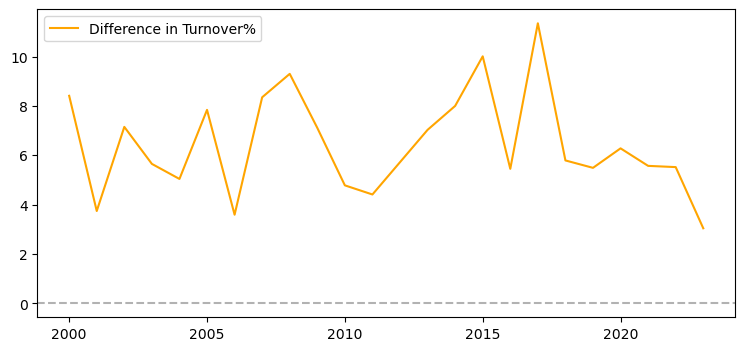

In [12]:
plt.figure(figsize=(9,4))
x = winners['Year']
y2 = winners['SRS']

plt.plot(x, y2,label = 'Difference in Turnover%', color='Orange')
#plt.plot(x, y3, label = 'Difference in EFG%', color='Red')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.legend()
plt.show()

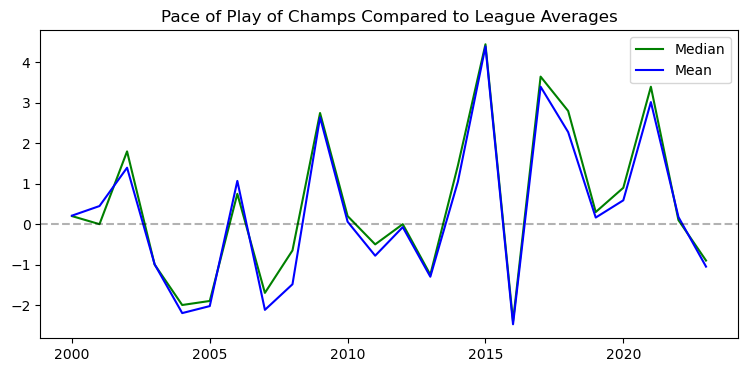

In [13]:
plt.figure(figsize=(9,4))
x = winners['Year']

y1 = winners['Pace']
y2 = modeling[['Pace', 'Year']].groupby(by='Year').agg(['mean', 'median'])['Pace']

#y2 = winners['eFG%']-winners['eFG%_1']

plt.plot(x, np.array(y1)-np.array(y2['median']), color='green', label='Median')
plt.plot(x, np.array(y1)-np.array(y2['mean']), color='blue', label='Mean')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Pace of Play of Champs Compared to League Averages')

plt.legend()
plt.show()

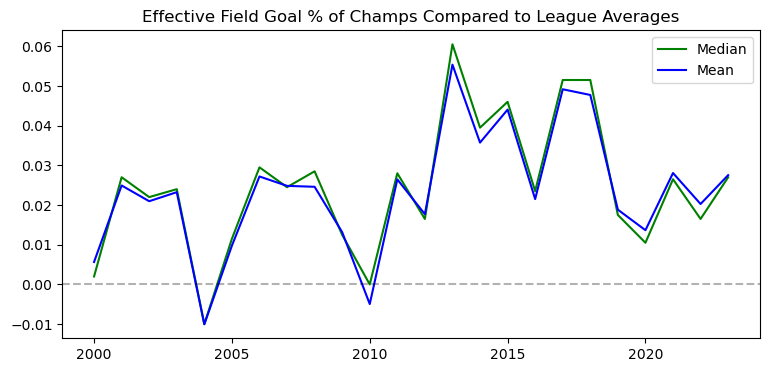

In [14]:
plt.figure(figsize=(9,4))
x = winners['Year']

y1 = winners['eFG%']
y2 = modeling[['eFG%', 'Year']].groupby(by='Year').agg(['mean', 'median'])['eFG%']

#y2 = winners['eFG%']-winners['eFG%_1']

plt.plot(x, np.array(y1)-np.array(y2['median']), color='green', label='Median')
plt.plot(x, np.array(y1)-np.array(y2['mean']), color='blue', label='Mean')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Effective Field Goal % of Champs Compared to League Averages')

plt.legend()
plt.show()

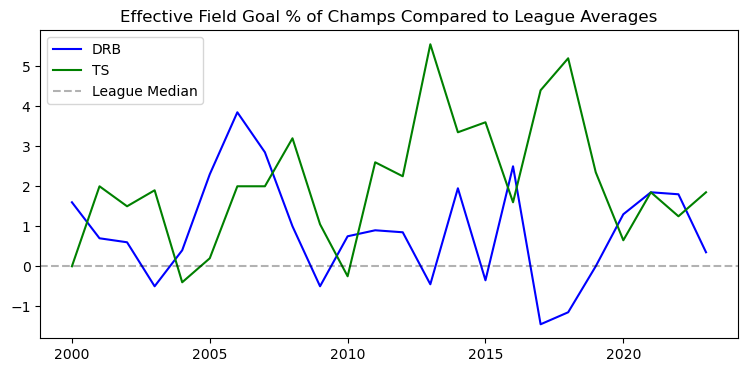

In [15]:
plt.figure(figsize=(9,4))
x = winners['Year']

y1 = winners['ORB%']
y2 = winners['DRB%']
y3 = winners['TS%']*100
y4 = modeling[['ORB%','DRB%','TS%','Year']].groupby(by='Year').agg(['mean', 'median'])

#y2 = winners['eFG%']-winners['eFG%_1']

#plt.plot(x, np.array(y1)-np.array(y4[('ORB%',   'median')]), color='green', label='ORB')
plt.plot(x, np.array(y2)-np.array(y4[('DRB%',   'median')]), color='blue', label='DRB')
plt.plot(x, np.array(y3)-np.array(y4[('TS%',   'median')])*100, color='green', label='TS')


plt.axhline(y=0, color='black', linestyle='--', alpha=0.3, label='League Median')
plt.title('Effective Field Goal % of Champs Compared to League Averages')

plt.legend()
plt.show()

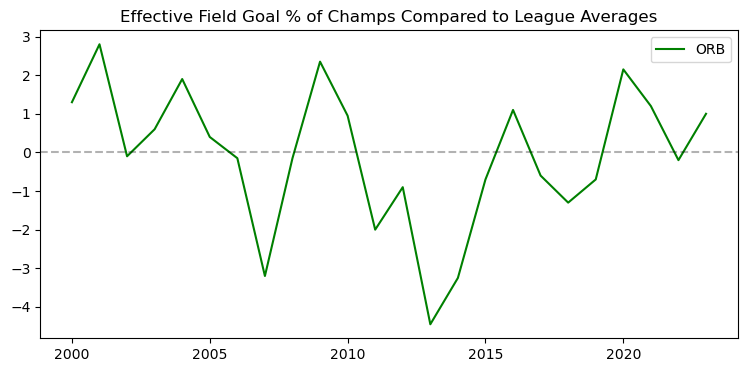

In [16]:
plt.figure(figsize=(9,4))
x = winners['Year']

y1 = winners['ORB%']
y2 = modeling[['ORB%','Year']].groupby(by='Year').agg('median')


plt.plot(x, np.array(y1)-np.array(y2['ORB%']), color='green', label='ORB')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Effective Field Goal % of Champs Compared to League Averages')

plt.legend()
plt.show()

# 4. Modeling<a id='4'></a>
[(Back to Top)](#top)

In [17]:
modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                715 non-null    object 
 1   Year                715 non-null    int64  
 2   G                   715 non-null    float64
 3   Age                 715 non-null    float64
 4   W                   715 non-null    float64
 5   MOV                 715 non-null    float64
 6   SOS                 715 non-null    float64
 7   SRS                 715 non-null    float64
 8   NRtg                715 non-null    float64
 9   Pace                715 non-null    float64
 10  3PAr                715 non-null    float64
 11  TS%                 715 non-null    float64
 12  eFG%                715 non-null    float64
 13  TOV%                715 non-null    float64
 14  ORB%                715 non-null    float64
 15  eFG%_1              715 non-null    float64
 16  TOV%_1  

In [18]:
finals = modeling.copy()
finals.query('Year >= 2015', inplace=True)
finals['Champs'] = np.where(finals['Round Finished']==5, 1, 0)
finals['Champs'].value_counts()

0    261
1      9
Name: Champs, dtype: int64

In [19]:
def add_noise(x):
    if isinstance(x, float):
        # Sample noise from a normal distribution with mean=x and std=0.01*x
        noise = np.random.normal(x, abs(0.01 * x))
        return round(noise, 3)
    else:
        return x

# Apply noise to each entry in the DataFrame
# noisy_df = df.applymap(add_noise)

In [20]:
needed = np.diff(finals['Champs'].value_counts())[0]*-1 # num of more non winners than champs
noised = finals.query('Champs==1').sample(needed, replace=True, ignore_index=True)
noised = noised.applymap(add_noise)
finals['Synthetic'] = False
noised['Synthetic'] = True
df = pd.concat([finals, noised], ignore_index=True)
df[['Champs','Synthetic']].value_counts()

Champs  Synthetic
0       False        261
1       True         252
        False          9
dtype: int64

In [21]:
y = df['Champs']
X = df.drop(['Team','Year','Round Finished','Champs','Synthetic'], axis=1)
X

,G,Age,W,MOV,SOS,SRS,NRtg,Pace,3PAr,TS%,eFG%,TOV%,ORB%,eFG%_1,TOV%_1,DRB%,TOV_szn_per100poss,PF_szn_per100poss
0,82.000,27.800,60.000,5.430,-0.680,4.750,5.800,93.900,0.321,0.563,0.527,13.500,21.400,0.492,14.900,73.400,15.100,18.900
1,82.000,25.000,40.000,0.160,-0.560,-0.400,0.200,95.800,0.280,0.523,0.489,12.500,24.700,0.494,13.700,75.000,14.300,21.900
2,82.000,28.600,38.000,-2.880,-0.250,-3.130,-3.000,92.700,0.240,0.529,0.491,13.000,23.900,0.506,12.900,73.700,14.700,20.500
3,82.000,26.000,33.000,-3.170,-0.270,-3.440,-3.400,93.000,0.226,0.498,0.456,11.200,22.100,0.487,12.000,79.300,12.700,19.400
4,82.000,28.800,50.000,3.000,-0.460,2.540,3.200,92.800,0.269,0.536,0.489,12.900,27.000,0.473,11.300,74.400,14.900,19.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,83.076,26.536,52.140,3.366,-0.292,3.038,3.376,97.219,0.361,0.604,0.572,13.249,25.042,0.543,12.252,76.443,14.861,18.844
518,80.746,29.157,58.911,6.031,-0.192,5.815,6.049,99.890,0.340,0.597,0.568,14.261,20.759,0.495,12.574,76.086,15.835,19.649
519,83.071,28.315,56.708,5.938,-0.547,5.486,6.377,92.488,0.357,0.549,0.526,12.763,24.960,0.498,12.679,77.718,14.431,21.637
520,81.447,26.708,58.648,6.010,-0.597,5.493,6.004,100.673,0.374,0.578,0.543,12.553,21.747,0.521,13.169,77.344,13.959,20.489


In [26]:
from sklearn.model_selection import KFold


def KFolds(X, y, model, loss_func, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        scores.append(loss_func(y_test, model.predict(X_test)))
    return np.mean(scores)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

classification_models = [LogisticRegression(), RandomForestClassifier(),
                        XGBClassifier()]

# Define metrics functions
metrics_functions = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score,
    'AUROC': roc_auc_score,
    'AUPRC': average_precision_score
}

def evaluate_model(X, y, model, metrics):
    model.fit(X, y)
    y_pred = model.predict(X)
    results = {}
    for metric_name, metric_func in metrics.items():
        if metric_name in ['AUROC', 'AUPRC']:
            if metric_name == 'AUROC':
                score = roc_auc_score(y, model.predict_proba(X)[:, 1])
            else:
                score = average_precision_score(y, model.predict_proba(X)[:, 1])
        else:
            score = metric_func(y, y_pred)
        results[metric_name] = score
    return results

def test_base_models(X, y):
    for model in classification_models:
        results = evaluate_model(X, y, model, metrics_functions)
        print(f"Model: {type(model).__name__}")
        for metric_name, score in results.items():
            print(f"{metric_name}: {score:.4f}")
        print()

test_base_models(X, y)


/Users/alexbradshaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.9310
Precision: 0.8814
Recall: 0.9962
F1-score: 0.9353
AUROC: 0.9520
AUPRC: 0.9158

Model: RandomForestClassifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUROC: 1.0000
AUPRC: 1.0000

Model: XGBClassifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUROC: 1.0000
AUPRC: 1.0000



In [27]:
import torch
import torch.nn as nn
import torch.optim as optim


class FeedforwardNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, hidden_functions, output_size):
        super(FeedforwardNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.functions = hidden_functions
        self.criterion = torch.nn.CrossEntropyLoss()

        # Creates layers
        self.layers = nn.ModuleList()
        prev_size = self.input_size
        for i, size in enumerate(hidden_sizes):
            self.layers.append(nn.Linear(prev_size, size))
            if i < len(hidden_functions):
                self.layers.append(nn.Sequential(hidden_functions[i]))
            prev_size = size
        self.layers.append(nn.Linear(prev_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def fit(self, X, y, learning_rate, epochs, p=True):
        # Ensure dtypes are usable
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.long)

        # Calculate min and max values of X
        X_min = torch.min(X, dim=0).values
        X_max = torch.max(X, dim=0).values

        # Min-Max scaling to bring all columns within the range 0-1
        X = (X - X_min) / (X_max - X_min)
        
        # Define loss and optimizer
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)

            # Calculate loss
            loss = self.criterion(output, y)

            # Backpropagation
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            # Print the loss every 10% epochs
            if(p):
                if epoch % epochs/10 == epochs/10-1:
                    print(f"Epoch {epoch+1}: Loss = {loss.item():.8f}")
        return round(loss.item(), 5)

    def predict_proba(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        output = self.forward(X)
        probabilities = nn.functional.softmax(output, dim=1)
        return probabilities.detach().numpy()

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        output = self.forward(X)
        _, predicted_classes = torch.max(output, dim=1)
        return predicted_classes.detach().numpy()

    def check_CE_loss(self, X, y):
        probabilities = self.predict_proba(X)
        loss = self.criterion(torch.tensor(probabilities, dtype=torch.float32), y)
        loss.backward()
        return round(loss.item(), 5)

    def check_accuracy(self, X, y):
        classes = self.predict(torch.tensor(X, dtype=torch.float32))
        check = classes == y
        missed = sum(check)
        length = len(check)
        print(f"{missed}/{length}")
        return missed/length

In [28]:
def KFold(df, folds=5, window_size=10, learning_rate=0.01, epochs=100):
    losses = []
    for year in range(2022, 2022-folds, -1):
        train = df[(df['Year'] < year) & (df['Year'] >= year-window_size)]
        val = df[(df['Year'] == year) & (df['Synthetic'] == True)]
        X_train = train.drop(
            ['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1).values
        Y_train = train['Round Finished'].values

        X_val = val.drop(['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1)
        Y_val = val['Round Finished']

        X_val = torch.tensor(X_val.values, dtype=torch.float64)
        Y_val = torch.tensor(Y_val.values, dtype=torch.int64)
        # funcs: F.relu, nn.sigmoid, torch.matmul

        model = FeedforwardNetwork(X_train.shape[1], hidden_sizes=[1000, 500,500,500,500,500],
                           hidden_functions=[nn.ReLU()],
                           output_size=6)
        losses.append(model.fit(X_train, Y_train, learning_rate, epochs, False))
    return round(np.mean(losses), 4), model

# TODO:
Documentation
Training, validation, test split
Try NN
Feature Importance


In [ ]:
df = pd.read_csv('./df_w_noise.csv', index_col='Unnamed: 0')
#df['Round Finished'] = df['Round Finished'].map({0:0, 1:0, 2:0, 3:0, 4:1, 5:1})
train = df[df['Year']!=2023].reset_index(drop=True)
test = df[(df['Year']==2023) & (df['Synthetic']==False)].reset_index(drop=True)


In [ ]:
loss, model = KFold(train, learning_rate=0.01, epochs=100,
                    folds=5, window_size=10)
loss

In [ ]:
model.predict(test.drop(
            ['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1).values)

In [ ]:
combined['Round Finished'].value_counts()

In [ ]:
X_test = combined[(combined['Year']==2023) & (combined['Synthetic']==False)].drop(
            ['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1)
Y_test = combined[(combined['Year']==2023) & (combined['Synthetic']==False)]['Round Finished']
X_test

In [ ]:
model.predict(X_test.values)

In [ ]:
losses = []
for i, data in enumerate([full, combined]):
    for windows in range(3, 18):
        for lr in [0.1, 0.01]:
            for epochs in [50, 100]:
                params = [i, windows, lr, epochs]
                loss = KFold(data, learning_rate=lr, epochs=epochs, window_size=windows)[0]
                params += ([loss])
                losses.append(params)

In [ ]:
list(losses)

In [ ]:
losses = np.array(losses)
losses = losses[losses[:, 4].argsort()]
for i in range(4):
    plt.plot(losses[:15,4], losses[:15,1])

In [ ]:
import pandas as pd

def drop_highly_correlated_columns(df, threshold=0.9):
    # Compute the correlation matrix
    corr_matrix = df.corr().abs()

    # Create a mask to identify highly correlated columns
    mask = corr_matrix >= threshold

    # Exclude diagonal and lower triangle of the correlation matrix
    mask = mask.mask(np.triu(np.ones(mask.shape, dtype=bool), k=1))

    # Get the names of highly correlated columns
    drop_cols = [column for column in mask.columns if any(mask[column])]

    # Drop the highly correlated columns from the DataFrame
    df_filtered = df.drop(columns=drop_cols)

    return df_filtered


In [ ]:
testing = combined.copy()
mask = testing.corr().abs() >= 0.8
mask = mask.mask(np.triu(np.ones(mask.shape, dtype=bool), k=1))
drop_cols = [mask[column].sum() for column in mask.columns if any(mask[column])]
drop_cols

In [ ]:
full.corr().abs()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('./df_no_noise.csv')
df['Round Finished'].value_counts()

In [ ]:
X, y = df.drop('Round Finished', axis=1), df['Round Finished']

In [ ]:
train = df[df['Year']!=2023]
test = df[(df['Year']==2023) & (df['Synthetic']==False)]
train.shape, test.shape

In [ ]:
train.info()

In [ ]:
model = RandomForestClassifier()
model.fit(train.drop(['Unnamed: 0','Team','Year','Round Finished'], axis=1), train['Round Finished'])

In [ ]:
probs = model.predict_proba(test.drop(['Unnamed: 0','Team','Year','Round Finished'], axis=1))
probs

In [ ]:
test['Team'].iloc[np.argmax(probs, axis=0)]

[Back to Top](#top)